# MLOPS project - Model design

Author : **Nicolas Deronsart**

In [1]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from spacy.lang.fr.stop_words import STOP_WORDS as french_stopwords

import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing

Before training a first model, we need to preprocess the training set to make it usable by the model.  

First we load the dataset.

In [2]:
df = pd.read_csv('../data/train.csv')
df = df.drop('Unnamed: 0', axis=1)
df

,film-url,review,polarity
0,http://www.allocine.fr/film/fichefilm-135259/c...,Si vous cherchez du cinéma abrutissant à tous ...,0
1,http://www.allocine.fr/film/fichefilm-172430/c...,"Trash, re-trash et re-re-trash...! Une horreur...",0
2,http://www.allocine.fr/film/fichefilm-15105/cr...,"Et si, dans les 5 premières minutes du film, l...",0
3,http://www.allocine.fr/film/fichefilm-188629/c...,Mon dieu ! Quelle métaphore filée ! Je suis ab...,0
4,http://www.allocine.fr/film/fichefilm-23514/cr...,"Premier film de la saga Kozure Okami, ""Le Sabr...",1
...,...,...,...
159995,http://www.allocine.fr/film/fichefilm-132387/c...,Un rythme bien trop lent et un Ashton Kutcher ...,0
159996,http://www.allocine.fr/film/fichefilm-53313/cr...,Monsieur Duchovny vous êtes aussi piètre acteu...,0
159997,http://www.allocine.fr/film/fichefilm-248258/c...,Complètement différent des films de la série C...,1
159998,http://www.allocine.fr/film/fichefilm-268731/c...,Alors franchement pour le moment c'est le meil...,1


Then, we use the TF-IDF vectorizer to transform the text of the reviews into a vector of numbers in order to use it to train the model.

In [3]:
tfidf = TfidfVectorizer(stop_words=list(french_stopwords))
X_train = tfidf.fit_transform(df['review'])
X_train.shape

/Users/deronsart/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['neuf', 'qu', 'quelqu'] not in stop_words.
  warnings.warn(


(160000, 152189)

In [4]:
y_train = df['polarity']
y_train.shape

(160000,)

Now, we can use the vectorized text to train a first model.

## Model conception

Let's try first with a classic Logistic Regression model.

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/deronsart/anaconda3/envs/mlops/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Now, we have to evaluate the model. To do so we are going to use the test set.

In [6]:
df_test = pd.read_csv('../data/test.csv')
df_test

,Unnamed: 0,film-url,review,polarity
0,0,http://www.allocine.fr/film/fichefilm-25385/cr...,"Magnifique épopée, une belle histoire, touchan...",1
1,1,http://www.allocine.fr/film/fichefilm-1954/cri...,Je n'ai pas aimé mais pourtant je lui mets 2 é...,0
2,2,http://www.allocine.fr/film/fichefilm-135523/c...,Un dessin animé qui brille par sa féerie et se...,1
3,3,http://www.allocine.fr/film/fichefilm-61514/cr...,"Si c'est là le renouveau du cinéma français, c...",0
4,4,http://www.allocine.fr/film/fichefilm-260395/c...,Et pourtant on s’en Doutait !Second volet très...,0
...,...,...,...,...
19995,19995,http://www.allocine.fr/film/fichefilm-59408/cr...,"je suis éventreur, arracheur, tailladeur, goug...",1
19996,19996,http://www.allocine.fr/film/fichefilm-141252/c...,Trémors 3 essouffle la série des trémors par u...,0
19997,19997,http://www.allocine.fr/film/fichefilm-48636/cr...,"0/20 : Tout d’abord, la mise en scène est tout...",0
19998,19998,http://www.allocine.fr/film/fichefilm-190157/c...,Un scénario très original mené par des personn...,1


In [7]:
X_test = tfidf.transform(df_test['review'])
y_test = df_test['polarity']
X_test.shape, y_test.shape

((20000, 152189), (20000,))

We then evaluate the model on the test set using sklearn.metrics functions.

In [8]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

In [9]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'F1: {f1}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'ROC AUC: {roc_auc}')
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

Accuracy: 0.9221
F1: 0.9196824414888132
Precision: 0.9096471548031817
Recall: 0.9299416180150125
ROC AUC: 0.9224073962480904


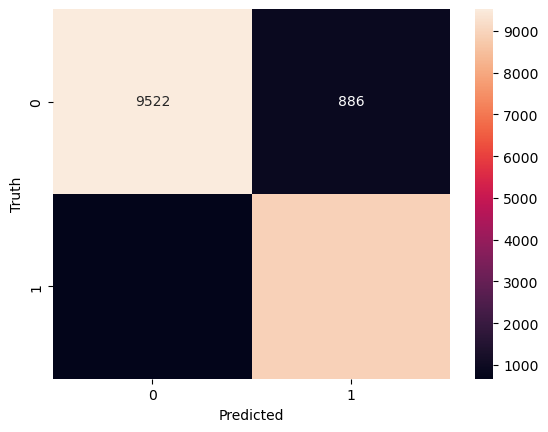

In [10]:
evaluate(model, X_test, y_test)

Our accuracy, f1 score, precision, recall and ROC AUC are giving us good scores on the evaluation set. Indeed, we have more than 90% for each scores.  

The precision and the recall are around 90% and 92%. 
This precision score means that if the model predict that the polarity value is 1, it is correct in 90% of the cases.  
This recall score means that if the polarity value is 1, the model predict it correctly in 92% of the cases.

## Pipeline creation